In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

Using TensorFlow backend.
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\caiyi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
data = pd.read_csv('Numeric_case3data.csv')

## Data exploration

In [3]:
data.head()

,studentID,grade,year,dropped,zip,ethnicity,sex,gpa,subsidizedLunches,employmentHours,hrsWifiPerWeek,sanctions,librarySwipesPerWeek,apClasses,athleticSeasons
0,12006,12,2012,0,15232,5,2,1.89,0,0,4,1,1,1,0
1,12008,12,2012,0,15206,5,2,2.21,1,0,10,2,3,0,0
2,12009,12,2012,0,15206,5,2,2.72,0,0,8,2,6,0,0
3,12010,12,2012,1,15206,5,2,1.67,0,0,4,2,6,2,0
4,12014,12,2012,0,15201,5,2,2.00,2,0,8,2,5,0,0


## Pre-processing

In [4]:
from sklearn.preprocessing import StandardScaler
data['zip'] = StandardScaler().fit_transform(data['zip'].values.reshape(-1,1))
#data = data.drop(['zip','sex','ethnicity'],axis=1)

In [5]:
data.head()

,studentID,grade,year,dropped,zip,ethnicity,sex,gpa,subsidizedLunches,employmentHours,hrsWifiPerWeek,sanctions,librarySwipesPerWeek,apClasses,athleticSeasons
0,12006,12,2012,0,1.803643,5,2,1.89,0,0,4,1,1,1,0
1,12008,12,2012,0,-0.556028,5,2,2.21,1,0,10,2,3,0,0
2,12009,12,2012,0,-0.556028,5,2,2.72,0,0,8,2,6,0,0
3,12010,12,2012,1,-0.556028,5,2,1.67,0,0,4,2,6,2,0
4,12014,12,2012,0,-1.009811,5,2,2.00,2,0,8,2,5,0,0


In [6]:
data = data.drop(['studentID'],axis=1)
data.head()

,grade,year,dropped,zip,ethnicity,sex,gpa,subsidizedLunches,employmentHours,hrsWifiPerWeek,sanctions,librarySwipesPerWeek,apClasses,athleticSeasons
0,12,2012,0,1.803643,5,2,1.89,0,0,4,1,1,1,0
1,12,2012,0,-0.556028,5,2,2.21,1,0,10,2,3,0,0
2,12,2012,0,-0.556028,5,2,2.72,0,0,8,2,6,0,0
3,12,2012,1,-0.556028,5,2,1.67,0,0,4,2,6,2,0
4,12,2012,0,-1.009811,5,2,2.00,2,0,8,2,5,0,0


In [7]:
X = data.iloc[:, data.columns != 'dropped']
y = data.iloc[:, data.columns == 'dropped']

In [8]:
X.columns

Index(['grade', 'year', 'zip', 'ethnicity', 'sex', 'gpa', 'subsidizedLunches',
       'employmentHours', 'hrsWifiPerWeek', 'sanctions',
       'librarySwipesPerWeek', 'apClasses', 'athleticSeasons'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [10]:
X_train.shape

(12519, 13)

In [11]:
X_test.shape

(5366, 13)

In [12]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [54]:
model = Sequential([
    Dense(units=8, input_dim = 13,activation='relu'),
    Dense(units=10,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


## Training

In [53]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=50)

ValueError: Error when checking target: expected dense_10 to have shape (2,) but got array with shape (1,)

In [17]:
score = model.evaluate(X_test, y_test)

5366/5366 [==============================] - 0s 23us/step


In [18]:
print(score)

[0.9311609657169837, 0.9422288482374902]


In [21]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

In [22]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [24]:
print(cnf_matrix)

[[5056    0]
 [ 310    0]]


Confusion matrix, without normalization
[[5056    0]
 [ 310    0]]


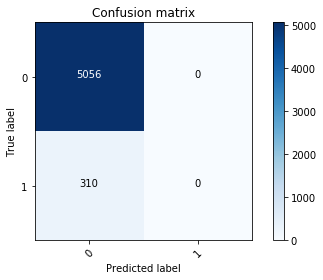

In [25]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])

In [26]:
plt.show()

Confusion matrix, without normalization
[[16837     0]
 [ 1048     0]]


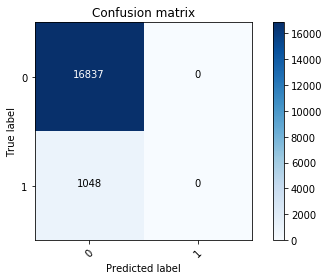

In [27]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

## Undersampling

In [28]:
fraud_indices = np.array(data[data.dropped == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

1048


In [29]:
normal_indices = data[data.dropped == 0].index

In [30]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

1048


In [31]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

2096


In [32]:
under_sample_data = data.iloc[under_sample_indices,:]

In [33]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'dropped']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'dropped']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [35]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=20)

Epoch 1/20
1467/1467 [==============================] - 0s 275us/step - loss: 7.4837 - acc: 0.4874
Epoch 2/20
1467/1467 [==============================] - 0s 64us/step - loss: 7.1591 - acc: 0.4874
Epoch 3/20
1467/1467 [==============================] - 0s 63us/step - loss: 7.5182 - acc: 0.4874: 0s - loss: 7.5504 - acc: 0.493
Epoch 4/20
1467/1467 [==============================] - 0s 63us/step - loss: 7.3905 - acc: 0.4874
Epoch 5/20
1467/1467 [==============================] - 0s 63us/step - loss: 7.1240 - acc: 0.4874
Epoch 6/20
1467/1467 [==============================] - 0s 63us/step - loss: 7.4710 - acc: 0.4874
Epoch 7/20
1467/1467 [==============================] - 0s 61us/step - loss: 7.4259 - acc: 0.4874
Epoch 8/20
1467/1467 [==============================] - 0s 65us/step - loss: 7.3104 - acc: 0.4874
Epoch 9/20
1467/1467 [==============================] - 0s 58us/step - loss: 7.3661 - acc: 0.4874
Epoch 10/20
1467/1467 [==============================] - 0s 58us/step - loss: 6.8657 

Confusion matrix, without normalization
[[333   0]
 [296   0]]


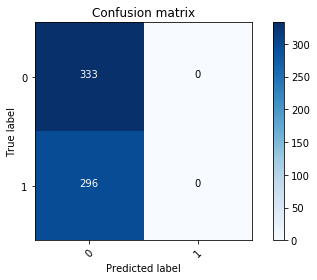

In [38]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[16837     0]
 [ 1048     0]]


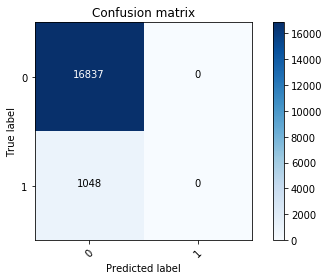

In [39]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

## SMOTE

In [40]:
# %%bash
# pip install -U imbalanced-learn

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

In [43]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [45]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=20)

Epoch 1/20
23571/23571 [==============================] - 2s 76us/step - loss: 6.1856 - acc: 0.5049
Epoch 2/20
23571/23571 [==============================] - 1s 58us/step - loss: 6.1443 - acc: 0.5049
Epoch 3/20
23571/23571 [==============================] - 1s 60us/step - loss: 6.1862 - acc: 0.4960
Epoch 4/20
23571/23571 [==============================] - 1s 61us/step - loss: 6.1765 - acc: 0.5011
Epoch 5/20
23571/23571 [==============================] - 1s 61us/step - loss: 6.1598 - acc: 0.5006
Epoch 6/20
23571/23571 [==============================] - 1s 63us/step - loss: 6.1782 - acc: 0.5020: 1s - l
Epoch 7/20
23571/23571 [==============================] - 1s 59us/step - loss: 6.2487 - acc: 0.5001
Epoch 8/20
23571/23571 [==============================] - 1s 61us/step - loss: 6.2135 - acc: 0.5012
Epoch 9/20
23571/23571 [==============================] - 1s 61us/step - loss: 6.1454 - acc: 0.5052
Epoch 10/20
23571/23571 [==============================] - 2s 68us/step - loss: 6.1868 - acc

Confusion matrix, without normalization
[[4959    0]
 [5144    0]]


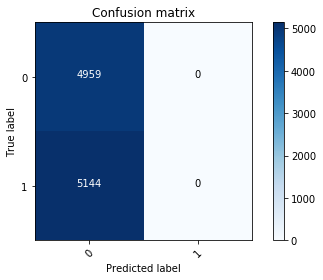

In [47]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()




Confusion matrix, without normalization
[[16837     0]
 [ 1048     0]]


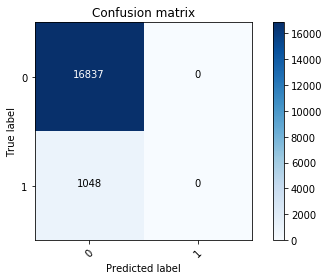

In [48]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

In [50]:
print(classification_report(y_expected,y_pred.round()))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16837
           1       0.00      0.00      0.00      1048

    accuracy                           0.94     17885
   macro avg       0.47      0.50      0.48     17885
weighted avg       0.89      0.94      0.91     17885



C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
